In [45]:
%load_ext autoreload
%autoreload 2

from PIL import Image
import torch
import numpy as np

from generate_dataset import simple_ring_dataset, randomized_ring_dataset

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


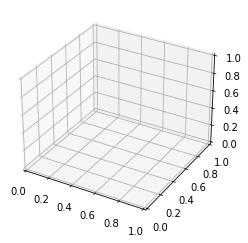

In [4]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

In [28]:
dataset_generator = randomized_ring_dataset(N=32)
imgs = dataset_generator.generate_dataset(test_return=True)

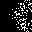

In [29]:
Image.fromarray(imgs[np.random.choice(10000)])

In [85]:
distr, (means, nrgs,), (pmt, center, sig), features = dataset_generator.prob_distr(means=dataset_generator.means, nrgs=dataset_generator.nrgs)

In [86]:
X, Y, Z = axes3d.get_test_data(0.05)
X, Y, Z

(array([[-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        ...,
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
        [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5]]),
 array([[-30. , -30. , -30. , ..., -30. , -30. , -30. ],
        [-29.5, -29.5, -29.5, ..., -29.5, -29.5, -29.5],
        [-29. , -29. , -29. , ..., -29. , -29. , -29. ],
        ...,
        [ 28.5,  28.5,  28.5, ...,  28.5,  28.5,  28.5],
        [ 29. ,  29. ,  29. , ...,  29. ,  29. ,  29. ],
        [ 29.5,  29.5,  29.5, ...,  29.5,  29.5,  29.5]]),
 array([[-0.00982064, -0.0113957 , -0.01319036, ..., -0.01522953,
         -0.01319036, -0.0113957 ],
        [-0.0113957 , -0.01322338, -0.01530587, ..., -0.01767209,
         -0.01530587, -0.01322338],
        [-0.01319036, -0.01530587, -0.01771632, ..., -0.02045518,
         -0.0177

In [87]:
means = np.expand_dims(means, axis=1).repeat(repeats=distr.shape[1], axis=1)
nrgs = np.expand_dims(nrgs, axis=0).repeat(repeats=distr.shape[0], axis=0)

In [89]:
distr

array([[2.58315837e-43, 3.59616166e-43, 4.65981510e-43, 5.67281839e-43,
        6.73647184e-43, 7.74947512e-43, 8.81312857e-43, 9.82613185e-43],
       [3.43137948e-38, 4.77701849e-38, 6.18993945e-38, 7.53557846e-38,
        8.94849943e-38, 1.02941384e-37, 1.17070594e-37, 1.30526984e-37],
       [2.08686282e-33, 2.90524040e-33, 3.76453685e-33, 4.58291443e-33,
        5.44221089e-33, 6.26058846e-33, 7.11988492e-33, 7.93826250e-33],
       [5.81067373e-29, 8.08936931e-29, 1.04819997e-28, 1.27606952e-28,
        1.51533256e-28, 1.74320212e-28, 1.98246515e-28, 2.21033471e-28],
       [7.40741223e-25, 1.03122798e-24, 1.33623907e-24, 1.62672582e-24,
        1.93173692e-24, 2.22222367e-24, 2.52723476e-24, 2.81772152e-24],
       [4.32328608e-21, 6.01869239e-21, 7.79886901e-21, 9.49427532e-21,
        1.12744519e-20, 1.29698582e-20, 1.47500349e-20, 1.64454412e-20],
       [1.15523110e-17, 1.60826290e-17, 2.08394629e-17, 2.53697810e-17,
        3.01266149e-17, 3.46569329e-17, 3.94137668e-17, 4.

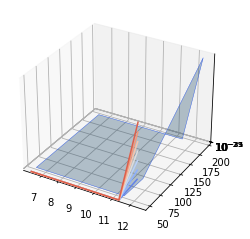

In [93]:
ax = plt.figure().add_subplot(projection='3d')
ax.set_zscale('log')

ax.plot_surface(means, nrgs, distr, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)

ax.contour(means, nrgs, distr, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(means, nrgs, distr, zdir='x', offset=-40, cmap='coolwarm')
ax.contour(means, nrgs, distr, zdir='y', offset=40, cmap='coolwarm')

# ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
#        xlabel='means', ylabel='energies', zlabel='PMT')

plt.show()

In [65]:
def create_ring_img(N, center, inner, outer):
    img_coor = [[(i, j) for i in range(N)] for j in range(N)]
    radius = np.linalg.norm(np.array(img_coor) - center, axis=2)
    img = torch.zeros(radius.shape, dtype=torch.uint8)
    for i in range(N):
        for j in range(N):
            if radius[i, j] >= inner and radius[i, j] < outer:
                img[i, j] = 255

    return img

In [114]:
def create_ring_img(img_coor, center, inner, outer):
    radius = np.linalg.norm(img_coor - center, axis=2)
    img = np.zeros_like(radius, dtype=np.uint8)
    
    img[np.logical_and(radius >= inner, radius < outer)] = 255

    return img

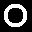

In [115]:
Image.fromarray(create_ring_img(32, 15, 8, 12))

In [55]:
np.array([[(i, j) for i in range(N)] for j in range(N)]).reshape((32*32, 2))

array([[ 0,  0],
       [ 1,  0],
       [ 2,  0],
       ...,
       [29, 31],
       [30, 31],
       [31, 31]])

In [92]:
N = 32
centers = np.array([[(i, j) for i in range(N)] for j in range(N)]).reshape((N * N, 2))
rings = []
for inner in np.arange(N * 0.1, N * 0.4):
    for outer in np.arange(inner + N * 0.05, N * 0.45):
        rings.append((inner, outer))

simple_rings = []
for i in range(10000):
    center = centers[np.random.choice(N * N)]
    inner, outer = rings[np.random.choice(len(rings))]
    simple_rings.append(create_ring_img(N, center, inner, outer))

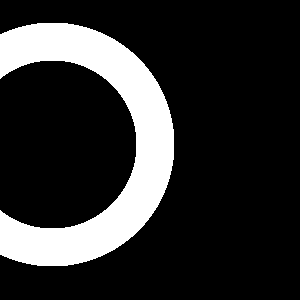

In [90]:
Image.fromarray(simple_rings[2].numpy())

In [29]:
dataset = ring_dataset()
rings = dataset.generate_dataset()

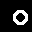

In [59]:
Image.fromarray(dataset.img[np.random.choice(10000)])

In [14]:
np.array([0, 1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])